In [ ]:
import pathlib
import tqdm
import shutil
import os
import matplotlib.pyplot as plt
from torchvision import transforms
%matplotlib inline

In [3]:
def check():
    img_path = '/data1/zj/data/add_bg_img'
    img_path = pathlib.Path(img_path)

    img_list = list(img_path.rglob('*.jpg'))
    print('start')
    pbar = tqdm.tqdm(total=len(img_list))
    for img in img_list:
        npy_path = pathlib.Path(str(img) + '.npy')
        if not img.exists() or img.stat().st_size <=0 or not npy_path.exists() or npy_path.stat().st_size <=0:
#             if img.exists():
#                 os.remove(str(img))
#             if npy_path.exists():
#                 os.remove(str(npy_path))
            print('img or npy is bad:{0},{1}'.format(img,npy_path))
        pbar.update(1)
    pbar.close()
    
def remove_t():
    input_file_folder = '/data1/zj/data/clip_black1/'
    output_file_folder = '/data1/zj/data/src_img'

    g = get_input_output_list(input_file_folder, output_file_folder, ['.jpg', '.png'], '.jpg',
                                                    save_to_same_folder=True)
    # pbar = tqdm(total=140645)
    for input_path, output_path in tqdm(g):
        # print(input_path,output_path)
        shutil.copy(input_path,output_path)
        # pbar.update(1)
    # pbar.close()

In [4]:
check()

  4%|▍         | 4453/100000 [00:00<00:02, 44523.57it/s]

start


100%|██████████| 100000/100000 [00:02<00:00, 46176.79it/s]


In [5]:
img_path = '/data1/zj/data/add_bg_img'

In [6]:
%%time
img_list = [x for x in os.listdir(img_path) if x.endswith('.jpg')]

CPU times: user 102 ms, sys: 109 ms, total: 212 ms
Wall time: 210 ms


In [7]:
len(img_list)

100000

In [8]:
%%time
img_list = list(pathlib.Path(img_path).rglob('*.jpg'))

CPU times: user 1.55 s, sys: 336 ms, total: 1.89 s
Wall time: 1.89 s


In [10]:
img_list

[PosixPath('/data1/zj/data/add_bg_img/86880.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/9678.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/79618.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/26914.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/17386.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/7141.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/2272.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/85019.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/30656.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/68877.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/60625.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/77961.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/18788.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/66151.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/90090.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/54650.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/80479.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/88949.jpg'),
 PosixPath('/data1/zj/data/add_bg_img/20952.jpg'),
 PosixPath('/data1/zj/data/add_bg_

In [12]:
import cv2
import numpy as np
import torch
import os
from PIL import Image

In [46]:
class ImageData(torch.utils.data.Dataset):
    def __init__(self, img_root, transform=None, t_transform=None):
        self.image_path = [os.path.join(img_root,x) for x in os.listdir(img_root) if x.endswith('.jpg')]
        self.label_path = [x + '.npy' for x in self.image_path]
        self.transform = transform
        self.t_transform = t_transform

    def __getitem__(self, index):
        image = Image.open(self.image_path[index])
#         image = cv2.imread(self.image_path[index])
        label = np.load(self.label_path[index])
        if self.transform is not None:
            image = self.transform(image)
        if self.t_transform is not None:
            label = self.t_transform(label)
        return image, label

    def __len__(self):
        return len(self.image_path)

In [58]:
img_path = '/data1/zj/data/add_bg_img'
test_data = ImageData(img_path,transform=transforms.ToTensor(),t_transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=1, shuffle=True, num_workers=3)

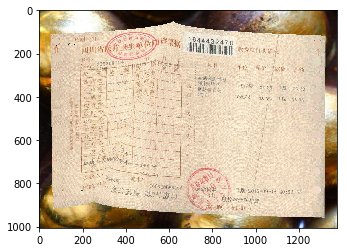

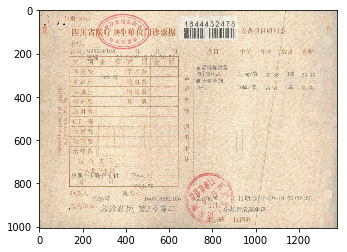

CPU times: user 1.9 s, sys: 4.08 s, total: 5.98 s
Wall time: 1.43 s


In [111]:
%%time
for img,label in train_loader:
#     print(img[0].permute(1,2,0).numpy().shape)
#     print(label.shape)
#     print(img.dtype)
#     print(img.shape)
    show_img = img[0].permute(1,2,0).numpy()
    plt.imshow(show_img)
    plt.show()
    label = label[0].permute(1,2,0).numpy()
    label_img = cv2.remap(show_img,label[:, :, 0], label[:, :, 1],cv2.INTER_LINEAR)
    plt.imshow(label_img)
    plt.show()
    break